# <p style="text-align: center;"> MÓDULO 3 - EXPLORATORY DATA ANALYTICS </p>
## Aula 4

### <span style="color: blue;"> * **Exercicio 1**</span>


**Passo 1** - **Importar** os dados do ficheiro Carros4 para uma DataFrame chamada **Carros4** e **apagar** colunas criadas via **transformações** das variáveis originais.

In [132]:
import pandas as pd
Carros4 = pd.read_csv('C:/Users/basketa/EDIT/MODULO3/AULA4/Carros4.csv')

In [133]:
Carros4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             200 non-null    object 
 1   fuel-type        200 non-null    object 
 2   aspiration       200 non-null    object 
 3   num-of-doors     200 non-null    object 
 4   body-style       200 non-null    object 
 5   drive-wheels     200 non-null    object 
 6   engine-location  200 non-null    object 
 7   wheel-base       200 non-null    float64
 8   length           200 non-null    float64
 9   width            200 non-null    float64
 10  height           200 non-null    float64
 11  curb-weight      200 non-null    int64  
 12  engine-size      200 non-null    int64  
 13  horsepower       200 non-null    int64  
 14  price            200 non-null    int64  
 15  length_min_max   200 non-null    float64
 16  width_std        200 non-null    float64
 17  height_log      

In [134]:
Carros4 = Carros4.drop(['length_min_max','width_std','height_log','price_decile'], axis = 1)

In [135]:
Carros4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             200 non-null    object 
 1   fuel-type        200 non-null    object 
 2   aspiration       200 non-null    object 
 3   num-of-doors     200 non-null    object 
 4   body-style       200 non-null    object 
 5   drive-wheels     200 non-null    object 
 6   engine-location  200 non-null    object 
 7   wheel-base       200 non-null    float64
 8   length           200 non-null    float64
 9   width            200 non-null    float64
 10  height           200 non-null    float64
 11  curb-weight      200 non-null    int64  
 12  engine-size      200 non-null    int64  
 13  horsepower       200 non-null    int64  
 14  price            200 non-null    int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 23.6+ KB


**Passo 2** - Analisar as variáveis quantitativas e calcular o **número de outliers**, segundo o **IQR**,
que cada uma tem.

In [137]:
lista = list(Carros4.describe().columns)

In [138]:
lista

['wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'horsepower',
 'price']

In [139]:
for i in lista:
    q1 = Carros4[i].quantile(0.25)
    q3 = Carros4[i].quantile(0.75)
    IQR = q3 - q1
    limite_inf = q1 - 1.5 * IQR
    limite_sup = q3 + 1.5 *IQR   
    print ("outliers " + i + ": " + str(len(Carros4)-len(Carros4[(Carros4[i] >= limite_inf) & (Carros4[i] <= limite_sup)])))

outliers wheel-base: 3
outliers length: 1
outliers width: 9
outliers height: 0
outliers curb-weight: 0
outliers engine-size: 10
outliers horsepower: 5
outliers price: 14


**Passo 3** - Considerar a variável quantitativa com **menor número de outliers** segundo os cálculos do passo anterior e **eliminar** os registos classificados como **outliers**.

In [141]:
q1 = Carros4['length'].quantile(0.25)
q3 = Carros4['length'].quantile(0.75)

IQR = q3 - q1

limite_inf = q1 - 1.5 * IQR
limite_sup = q3 + 1.5 * IQR

Carros4 = Carros4[(Carros4['length'] >= limite_inf) & (Carros4['length'] <= limite_sup)]

**Passo 4** - Verificar que **já não existem outliers**, segundo o IQR, na variável em questão.

In [143]:

outliers_length = Carros4[(Carros4['length'] < limite_inf) | (Carros4['length'] > limite_sup)]

num_outliers_length = outliers_length.shape[0]

print(num_outliers_length)


0


**Passo 5** - Analisar novamente as variáveis quantitativas e, calcular o **número de outliers**, agora segundo o método de **Estandardização**, que cada uma tem.

In [145]:
import numpy as np

var_quant = Carros4.select_dtypes(include=np.number)

standard = (var_quant - var_quant.mean()) / var_quant.std()

outliers_standard = ((standard < -3) | (standard > 3)).sum()

print(outliers_standard)

wheel-base     1
length         0
width          0
height         0
curb-weight    0
engine-size    5
horsepower     1
price          3
dtype: int64


**Passo 6** - Considerar as duas variáveis quantitativas com **menor número de outliers** segundo os cálculos do passo anterior, e criar uma **nova variável** com base nessas, como o **sufixo “_lim”**, onde se **restringe os seus valores** com base nos limites inferior e superior calculados no método
de **Estandardização**.

In [157]:
var_quant2 = ['wheel-base', 'horsepower']

for column in var_quant2:
    
    avg = Carros4[column].mean()
    std = Carros4[column].std()
    
    concat = column + '_lim'
    
    Carros4[concat] = [x if abs((x - avg) / std) <= 3 else
                        avg - 3 * std if (x - avg) / std < -3 else
                        avg + 3 * std
                        for x in Carros4[column]
                      ]

**Passo 7** - Validar em que **observações** as variáveis originais e as “_lim” tomam **valores diferentes**

In [163]:
Carros4.sort_values(by = 'wheel-base')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-size,horsepower,price,wheel-base_lim,horsepower_lim
130,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,50.8,1819,92,76,6855,86.600000,76.0
118,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,50.8,1713,92,58,6479,86.600000,58.0
51,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,130,111,16500,88.600000,111.0
31,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,130,111,13495,88.600000,111.0
91,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,194,207,32528,89.500000,207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,peugot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3485,152,95,17075,114.200000,95.0
36,peugot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3430,152,95,13860,114.200000,95.0
93,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,234,155,34184,115.600000,155.0
89,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,183,123,31600,115.600000,123.0


In [165]:
Carros4.sort_values(by = 'horsepower')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-size,horsepower,price,wheel-base_lim,horsepower_lim
151,volkswagen,diesel,std,two,sedan,fwd,front,97.3,171.7,65.5,55.7,2261,97,52,7775,97.3,52.000000
161,volkswagen,diesel,std,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2264,97,52,7995,97.3,52.000000
135,nissan,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,2017,103,55,7099,94.5,55.000000
157,toyota,diesel,std,four,sedan,fwd,front,95.7,166.3,64.4,53.0,2275,110,56,7898,95.7,56.000000
153,toyota,diesel,std,four,hatchback,fwd,front,95.7,166.3,64.4,52.8,2275,110,56,7788,95.7,56.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,nissan,gas,turbo,two,hatchback,rwd,front,91.3,170.7,67.9,49.7,3139,181,200,19699,91.3,200.000000
91,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,194,207,32528,89.5,207.000000
92,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,194,207,34028,89.5,207.000000
98,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,194,207,37028,89.5,207.000000


**Passo 8** - Considerando as variáveis do passo anterior, original e a limitada, **comparar os seus histogramas**.

<Axes: >

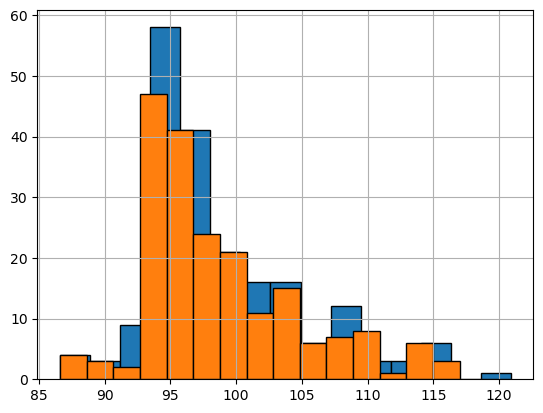

In [170]:
Carros4['wheel-base'].hist(bins=15, edgecolor='black')
Carros4['wheel-base_lim'].hist(bins=15, edgecolor='black')

<Axes: >

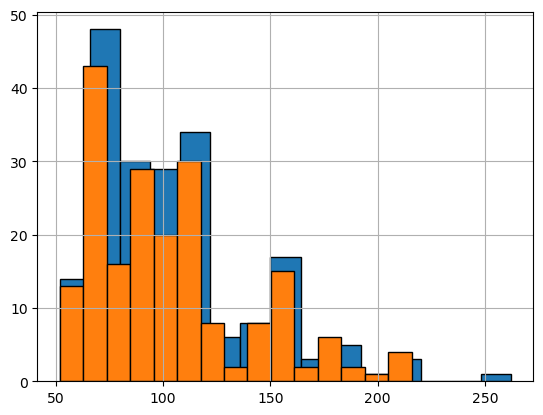

In [172]:
Carros4['horsepower'].hist(bins=15, edgecolor='black')
Carros4['horsepower_lim'].hist(bins=15, edgecolor='black')

**Passo 9** - Calcular a **correlação** entre as variáveis do passo 7, original e a limitada, e a variável **price**. Que podemos **concluir**?

In [177]:
Corr_horsepower_price = Carros4['horsepower'].corr(Carros4['price'])
Corr_horsepower_lim_price = Carros4['horsepower_lim'].corr(Carros4['price'])

print("Correlação horsepower com price: " + str(round(Corr_horsepower_price*100,3)))
print("Correlação horsepower_lim com price: " + str(round(Corr_horsepower_lim_price*100,3)))

Correlação horsepower com price: 80.877
Correlação horsepower_lim com price: 80.946


In [179]:
Corr_wheel_base_price = Carros4['wheel-base'].corr(Carros4['price'])
Corr_wheel_base_lim_price = Carros4['wheel-base_lim'].corr(Carros4['price'])

print("Correlação Corr_wheel_base_price com price: " + str(round(Corr_wheel_base_price*100,3)))
print("Correlação Corr_wheel_base_lim_price com price: " + str(round(Corr_wheel_base_lim_price*100,3)))

Correlação Corr_wheel_base_price com price: 58.169
Correlação Corr_wheel_base_lim_price com price: 57.664


In [181]:
# calculo da correlação PASSO A PASSO para a variável horsepower_lim:

mean_horsepower_lim = Carros4['horsepower_lim'].mean()
mean_price = Carros4['price'].mean()

Carros4['diff_horsepower_lim'] = Carros4['horsepower_lim'] - mean_horsepower_lim
Carros4['diff_price'] = Carros4['price'] - mean_price

numerador = (Carros4['diff_horsepower_lim'] * Carros4['diff_price']).sum()

denominador_horsepower_lim = (Carros4['diff_horsepower_lim'] ** 2).sum()
denominador_price = (Carros4['diff_price'] ** 2).sum()

correlação_horsepower_lim = numerador / np.sqrt(denominador_horsepower_lim * denominador_price)

print("Correlação horsepower_lim com price: " + str(round(correlação_horsepower_lim*100,3)))

Correlação horsepower_lim com price: 80.946


**Passo 10** - Considerando a variável quantitativa com **maior número de outliers** segundo os cálculos do passo 4, criar uma nova variável com base nessa, como o **sufixo “_decil”**, que corresponde ao valor da variável quando **agrupada em 10 decis**.

In [184]:
Carros4['engine-size_decil'] = pd.qcut(Carros4['engine-size'], q=10, labels=False) + 1

print(Carros4['engine-size_decil'].value_counts().sort_index())

engine-size_decil
1     20
2     29
3     14
4     21
5     21
6     21
7     14
8     23
9     19
10    17
Name: count, dtype: int64


**Nota** : O motivo para os bins **não terem dimensões iguais** está relacionado com o facto dos **pontos de corte** dos bins serem definidos em função dos **valores da variável**, e como existem vários **valores repetidos**, faz com que os registos com o valor igual tenham de ficar no mesmo bin, distorcendo um pouco a distribuição da variável

Podem verificar abaixo que as mudanças de **bin** estão sempre associadas a **alterações do valor da variável**.

In [186]:
#Motivo para os bins não terem tamanhos igua

Carros4.sort_values(by='engine-size', inplace = True)

pd.set_option('display.max_rows', None)  # Remove row limit

print(Carros4[['engine-size','engine-size_decil']])

     engine-size  engine-size_decil
8             70                  1
34            70                  1
17            70                  1
107           79                  1
44            80                  1
124           90                  1
109           90                  1
110           90                  1
121           90                  1
117           90                  1
147           90                  1
113           90                  1
125           90                  1
115           90                  1
114           90                  1
104           91                  1
128           91                  1
143           91                  1
111           91                  1
126           91                  1
130           92                  2
137           92                  2
139           92                  2
156           92                  2
140           92                  2
131           92                  2
120           92            

**Passo 11** - Considerando as variáveis do passo anterior, original e a limitada, **comparar os seus histogramas**.

<Axes: >

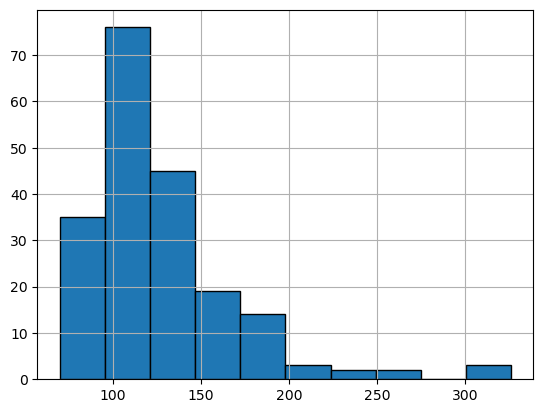

In [190]:
Carros4['engine-size'].hist(bins=10, edgecolor='black')

<Axes: >

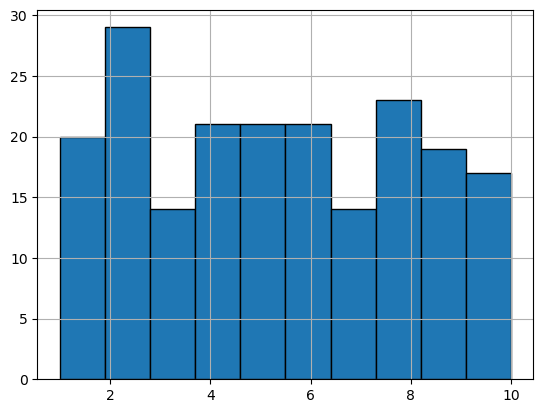

In [192]:
Carros4['engine-size_decil'].hist(bins=10, edgecolor='black')

**Passo 12** - Calcular a **correlação** entre as variáveis do passo 7, original e a limitada, e a variável **price**. Que podemos **concluir**?

In [194]:
Corr_engine_size_decil = Carros4['engine-size_decil'].corr(Carros4['price'])
Corr_engine_size = Carros4['engine-size'].corr(Carros4['price'])

print("Correlação engine_size: " + str(round(Corr_engine_size*100,3)))
print("Correlação engine_size_decil: " + str(round(Corr_engine_size_decil*100,3)))

Correlação engine_size: 87.266
Correlação engine_size_decil: 75.794


**Passo 13** - Exportar os dados de **Carros4** num ficheiro csv com o nome **Carros5**

In [197]:
Carros4.to_csv('C:/Users/basketa/EDIT/MODULO3/AULA4/Carros5.csv')